<a href="https://colab.research.google.com/github/DipanshuKumar449/EDA-PlayStore-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## World of Apps

No, doubt Mobile Applications are trending, ever wonder why?
The reasons are well known:

*   Makes life easy 
*   Apps are fun

*   Communication and Engagement
*   Smart marketing, Lead generations and many more.

### Analyse Reviews

Analysing reviews seriously, why is it even necessary?

>The answer is quite simple..

*   To help targeting the most impactful improvement to app,can view top trends and issues that the user mentions.
*   Through comprehensive analysis of designated apps, optimizing the ratings and reviews maintains high reputation.
*   1000+ 5-star ratings and high quality review contents have driven a lots of downloads, with massive percentage increase in conversion.







Lets now deep dive into our data files:
containing two files

*  Play Store Data.csv : It consists of name of applications and a total of 13 features describing the app.
*  User Reviews.csv : This file consists of 3 important features on how the use use feel regarding the app.



### Now let's kickstart the journey

## 1.Importing and Understanding the Dataset

In [1]:
# importing all the necessary modules for the analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import style

In [4]:
# Reading the dataset

df_apps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis/Play Store Data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [6]:
# getting the shape
df_apps.shape

(10841, 13)

In [7]:
# getting information for better understanding
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2.Data Cleaning

Incorrect, inconsitent data can lead to false conclusion and misdirects the scales.So, detecting and correcting of inaccurate records is necessary to maintain the flow.



*   After looking to the dataset the first thing comes in mind is that we have to 
deal with some special characters. Specifically some important features like Size, Install, Price contains characters like(' M ',' k ' ' , ' + ',' $ ') these column needs to be present in numerical form for furture analysis.
*   So, Moving on to remove the special characters from the respective features(columns).


*   While running the code one row i.e 10474 is a wrong feed so it need has to be removed


> To acheive this we use drop function




In [8]:
df_apps= df_apps.drop(10472)

### Changing the datatypes of all the columns which had to be of Numerical type but present as string for numerical evaluations.

*   The thing which is intresting with Size column is that it contains some rows having Size in Mb and some with Kb also it contains some apps Size that varies with device, While cleaning we decided to use the following points.


1.   Firstly, converting the KiloBytes to MegaBytes
2.   Then replacing the unwanted strings.

*   One challenge appered in the form of 'Varies with devices' present in Size column what we have decided that we will replace these rows with the mean of Sizes to effectively work with the dataset.


In [9]:
# While running this code, it throughs Future warning to handle this we use import warnings

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Simply going step by step
df_apps['Size'] = df_apps['Size'].str.replace('M','').str.replace('k','')
df_apps['Size'] = df_apps['Size'].replace('Varies with device',np.nan)  #repacing the value with np.nan
df_apps['Size'] = df_apps['Size'].astype(float)                         #converting to float

#Converting KiloByte To MegaByte

def convert(value):
  if value >=1000:
    return float(value)/1000
  else:
    return value

df_apps['Size'] = df_apps['Size'].apply(convert)                        #using the function to acheive the desired result
df_apps['Size'] = df_apps['Size'].fillna(np.mean(df_apps['Size']))      #using fillna to get the mean



*   The next thing is to convert the columns ['Installs','Price']
into 'float type'

> To acheive this we once again uses the advantages of astype()






















In [10]:
# Following the steps explained above:

# Working on column(install).
# Removing '+' and ',' from it.

df_apps['Installs'] = df_apps['Installs'].str.replace('+','').str.replace(',','')

# Working on column(price).
# Removing '$' from it.

df_apps['Price'] = df_apps['Price'].str.replace('$','')

#Using astype()
df_apps['Installs'] = df_apps['Installs'].astype(float)
df_apps['Price'] = df_apps['Price'].astype(float)

df_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [11]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


## 3. First Observation

Understanding the trend : Using Highest and Lowest values.

> Benifits of determining trend??

* Trend analysis allow to predict what's going to happen, based on whats already happend. It provides business with the information enabling to make data driven decisions with regards to future events. 







Based on the dataset we are first determining which Category has the highest impact in the world and which categoey is struggling to get the path.

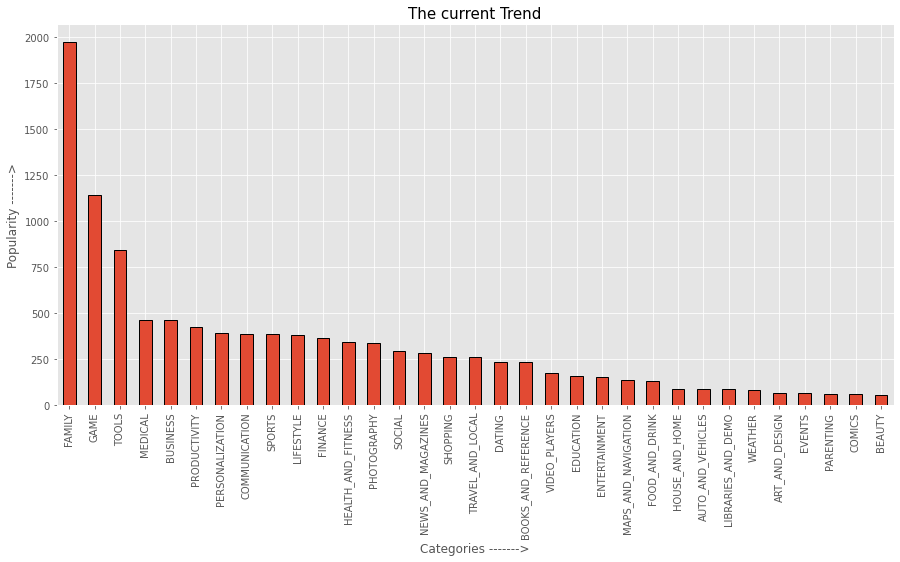

In [12]:
# Ploting the barplot for Category column

plt.style.use('ggplot')
trend_cat = df_apps['Category'].value_counts()

trends = trend_cat.plot.bar(figsize= (15,7) , linewidth = 1 , edgecolor = 'black')
trends.set_title('The current Trend',fontsize = 15)
trends.set_xlabel('Categories ------->',fontsize =12)
trends.set_ylabel('Popularity ------->',fontsize =12)
plt.show()




1.   Intresting results, but somewhat expected that Family and Game are ruling at the top.
2.   Any idea regarding Beauty and comics?? I think it requires Proactivity and Anticipations..

> Fine!! Data Analysis helped in improving our decision making process significantly.





Now, We will understand the Content Rating choices

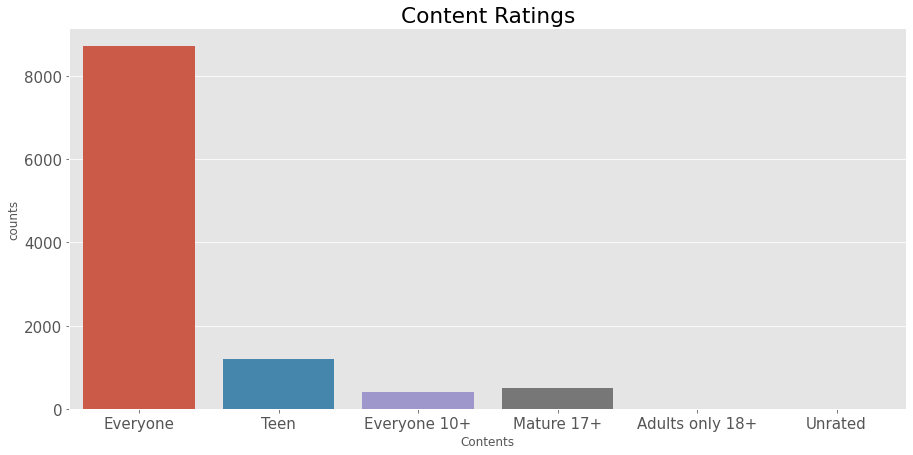

In [28]:
#using sns.countplot

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,7)
plt.rcParams['font.size']=(15)

sns.countplot('Content Rating',data=df_apps)
plt.title('Content Choice')
plt.xlabel('Contents',fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.show()


Okey, There is no doubt that what content is mostly prefered while making an app.

Now we are observing how Size affects the Downloads i.e installs.

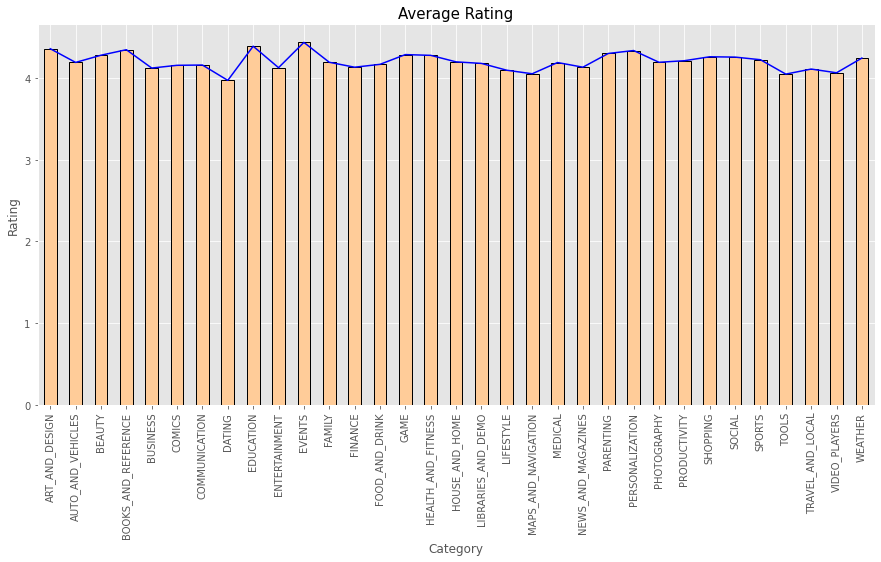

In [69]:
df_downloads = df_apps.groupby('Category')['Rating'].mean()

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)

df_downloads.plot(color='blue')
df_downloads.plot(kind='bar',linewidth=1,edgecolor='black',color='#ffcc99')
plt.title('Average Rating',fontsize=15)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Rating',fontsize=12)
plt.show()


One very intresting finding we have got from above chart:

*   Each and every Category is having an Average Rating of more than or near to ' 4 ' irrespective of size or downloads, which means that people will use those application which is highly engaging(depending on how developer makes it intresting) whether it belongs to art,beauty,education,family,finance,medicine,sports or anyone.



## 4.Second Observation

Understanding the comparision : On a technical aspect the process of comaring items to one another and distinguish their similarity and differences provide us with both quantitative and qualitative data.

*   Definitely this is mostly used by organization to analyse the progress of different data group.




As per our data set we'll try to compare 'size' and 'install' to understand the choice of storage preference while installing an app.

*   While Implementing the plot one challenge appered that there is a huge variation in the number of Installs.
*   So, we decided to convert these values to two places to make it look more effective in the scatter plot . We searched for a solution and came up with that while using scatter plot if we deal with np.log facility we can resolve the issue.In the upcoming code we we'll create a sperate columns as Installs_log to deal with it.


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


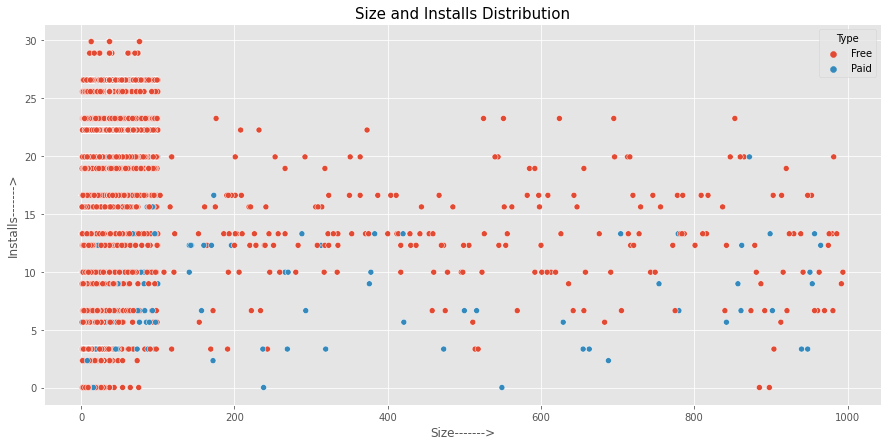

In [38]:
#Creating a separate column

df_apps['Installs_log'] = np.log2(df_apps['Installs'])

# using scatterplot to understand the relation between size and install
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)

sns.scatterplot(df_apps['Size'],df_apps['Installs_log'],hue = df_apps['Type'])
plt.title('Size and Installs Distribution', fontsize = 15)
plt.xlabel('Size------->',fontsize =12)
plt.ylabel('Installs------->',fontsize=12)
plt.show()



*   From the above result its completely clear that if the size of application is small it will get more downloads.
*   And when we deeply study the above plot it somewhat also clear  that Free apps have greater influence over paid app.Anyways we'll see this in the next part to have a clear understanding



### Paid v/s Free

From the above observation we can find the influence of the two different Types but to make it more clear lets just use piechat. 

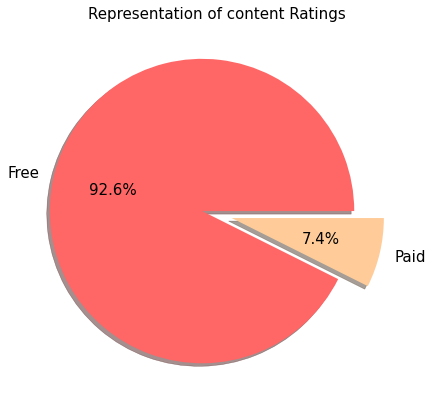

In [30]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,7)
plt.rcParams['font.size']=(15)

df_pie = df_apps['Type'].value_counts()
labels = ['Free','Paid']
explode = [0.1,0.1]
colors = ['#ff6666', '#ffcc99']       #taken colours from internet
plt.pie(df_pie,labels=labels,explode=explode,colors=colors,shadow=True,autopct='%1.1F%%')
plt.title('Representation of content Ratings',fontsize=15)
plt.show()

As its very well known that the piechart make things clear.

## 5.Third Observation

Understanding the correlations : Correlation is a statistical term describing the degree to which two variable moves in the coordination with one another.

Text(0.5, 1.0, 'Correlation')

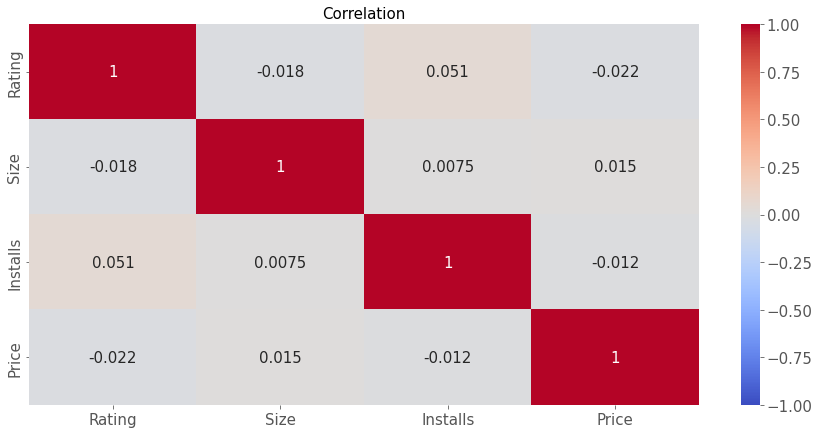

In [31]:
# Using heatmap to determine the correlations.

# Using the relevent columns for understanding the correlations.

df_heatmap = df_apps.copy()
df_heatmap = df_heatmap.iloc[:,:-1]

plt.figure(figsize=(15,7))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation',fontsize = 15)


## 6.Fourth Observation.

Now, Its time to play with the other Dataset we have. To give a breif context about the User Reviews, here are some points.


> First thing first it contains 4 features,each feature has its own property and is defined below.

*   Translated Reviews : To think or talk about something again and that's it(here we are taking about reviews corresponding to the apps)  
*   Sentiments : An attitude or opinion that is often caused or influenced by emotion here it has three categories we'll discuss this in an interesting manner.

*   Sentiment Polarity : For an element it defines the orientation of the expressed sentiment.
*   Sentiment_subjective :  An objective sentence expresses some factual information about the Apps.















In [32]:
df_user = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis/User Reviews.csv')

In [33]:
df_user.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [34]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Lets just make a thorough check on this dataset

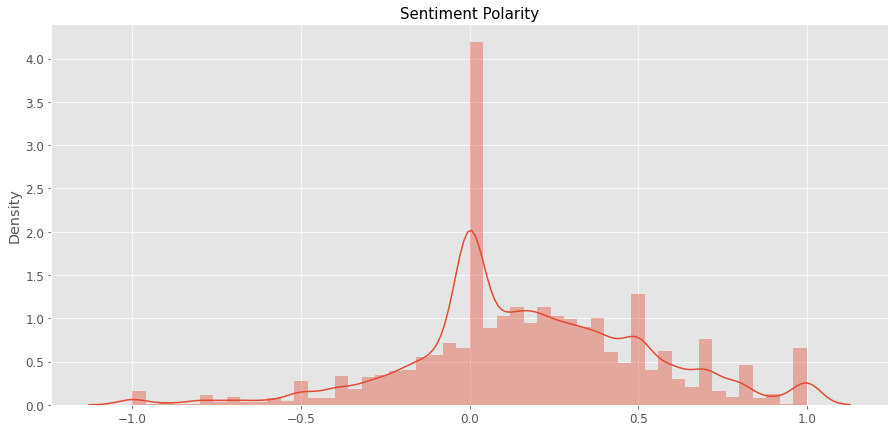

In [46]:
#Using someting new creating a distplot for Sentiment Polarity.
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 12

df_dist = df_user['Sentiment_Polarity'].values
sns.distplot(df_dist,hist = True)
plt.title('Sentiment Polarity',fontsize = 15)
plt.show()




*   
Alright it seems that people are not that much oriented(act of directing the 
attention or aiming towards a perticular thing) towards a perticular app. As we can see the Spikes are high near 0.0 and decreases both the sides.



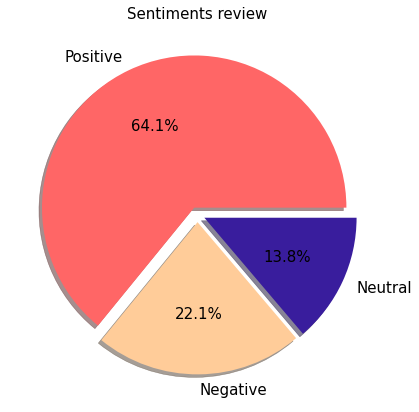

In [36]:
# Creating a pie chart for sentiment column

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,7)
plt.rcParams['font.size'] = 15

df_user_pie = df_user['Sentiment'].value_counts()
labels = ['Positive','Negative','Neutral']
explode = [0.05,0.05,0.05]
colors = ['#ff6666', '#ffcc99','#391d9d']       #taken colours from internet
plt.pie(df_user_pie,labels=labels,explode=explode,colors=colors,shadow=True,autopct='%1.1F%%')
plt.title('Sentiments review',fontsize=15)
plt.show()


The trend shows that the developers are doing great keeping their apps updated and gaining more and more attentions.

> Reason : Positive reviews.It also motivates the developers to make the apps more engaging.

